## Import all the essential liabraries 

In [45]:
import selenium 
from operator import itemgetter as ig 
import matplotlib.pyplot as plt 
from selenium.webdriver.chrome.options import Options 
import pandas as pd 
import time
plt.style.use('fivethirtyeight')

## Initialize Selenium

In [2]:
from selenium import webdriver 
DRIVER_PATH = 'C:\Program Files (x86)\chromedriver.exe' 

## creating a data structure to store the scraped elements 

In [3]:
# dictonary to store the data 
# for eah job we will scrape role, company, loction, experience & skill 

job_spec = {
    'roles':[],
    'companies':[],
    'locations':[],
    'skills':[],
    'experience':[]
}

# this is the way naukari represents data science jobs in their address 
job_type = 'data-scientist' 

# by changing the job_type variable you can hunt for any job of your choice 

options = Options() 
# we are creating a headless browser instance 
options.add_argument('--headless')

driver = webdriver.Chrome(DRIVER_PATH, options=options)
time.sleep(3) 

# we will scrape 50 pages 
num_of_pages = 50 





## Doing some testing with the code

In [4]:
i = 2
# https://www.naukri.com/data-science-jobs-2
#driver.get('https://www.naukri.com/'+job_type+"-jobs-2")

driver.get(f'https://www.naukri.com/'+job_type+"-jobs-{i}")

In [5]:
list_of_jobs = driver.find_elements_by_css_selector('#root > div.search-result-container > div.content > section.listContainer.fleft > div.list > article:nth-child(1)')

In [7]:
list_of_jobs[0] # this is the one object of the job 

<selenium.webdriver.remote.webelement.WebElement (session="8d67b230c1c4804f6ef955b97052cea2", element="3cf791c0-6706-44f1-b552-ea96d566d306")>

## Performing data scraping by getting all the elements 
- In this case for each page we will extract all the jobs and extract data from each job.

In [8]:
for i in range(1, num_of_pages):
    print(i)
    driver.get(f'https://www.naukri.com/'+job_type+"-jobs-{i}")
    time.sleep(3)
    list_of_jobs = driver.find_elements_by_css_selector('article.jobTuple.bgWhite.br4.mb-8')

    for job in list_of_jobs:
        driver.implicitly_wait(10)
        role = job.find_element_by_css_selector('a.title.fw500.ellipsis').text

        companies = job.find_element_by_css_selector('a.subTitle.ellipsis.fleft').text

        locations = job.find_element_by_css_selector('li.fleft.grey-text.br2.placeHolderLi.location').text

        experience = job.find_element_by_xpath('//*[@id="root"]/div[3]/div[2]/section[2]/div[2]/article[1]/div[1]/div/ul/li[1]').text

        skills = job.find_element_by_css_selector('ul.tags.has-description').text
        job_spec['roles'].append(role)
        job_spec['companies'].append(companies) 
        job_spec['locations'].append(locations) 
        job_spec['skills'].append(skills)
        job_spec['experience'].append(experience)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


WebDriverException: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: headless chrome=89.0.4389.128)


In [ ]:
# the data is now stored in job_spec which emulates a json file. so we can load the data directly as shown in the 

In [18]:
import pandas as pd 

In [20]:
df = pd.DataFrame(job_spec)

In [ ]:
# in this case I am storing this data to a csv file and a json file 

In [21]:
df.to_csv('scraped_data.csv')

In [22]:
df.to_json('scraped_data.json')

In [23]:
df.shape

(980, 5)

In [9]:
df = pd.read_json('scraped_data.json')

## doing some premilinary analysis to be sure

In [25]:
# find any null values 
df.isnull().sum()

roles         0
companies     0
locations     0
skills        0
experience    0
dtype: int64

In [26]:
# drop missing and null values 
# clean_df = df.dropna()

In [10]:
df.tail()

,roles,companies,locations,skills,experience
975,Data Scientist - Machine Learning,AugmatrixGo,Bangalore/Bengaluru,Hive\nR\nCloud Computing\nData Scientist\nComp...,6-10 Yrs
976,Urgent opening For Senior Data Scientists,Abzooba India Infotech Private Limited,Pune,IT Skills\nPython\nMachine Learning\nArtificia...,6-10 Yrs
977,Associate Data Scientist - CRM & Loyalty,Shell India Markets Private Limited,Bangalore/Bengaluru,Direct Marketing\nMultivariate Analysis\nR\nDa...,6-10 Yrs
978,Data Scientist - Business Analytics,Philips India Limited,Bangalore/Bengaluru,Process automation\nCloud computing\nChange ma...,6-10 Yrs
979,Data Scientist,Schneider Electric India Pvt. Ltd.,Bangalore/Bengaluru,Computer science\nData analysis\nAutomation\nM...,6-10 Yrs


In [15]:
# using lambda function to convert all the characters in a dataframe to lower case 
# in this case I am using doing the logic i am going to do in lambda function on a single row so some sense 
# can be made out of it 
df.iloc[0,:].astype(str).str.lower()

roles                    dbcg ind - gamma senior data scientist
companies                               boston consulting group
locations       mumbai, new delhi, chennai, bangalore/bengaluru
skills        computer science\nadvanced analytics\nsds\ndat...
experience                                             6-10 yrs
Name: 0, dtype: object

In [46]:
lower_df = df.apply(lambda x : x.astype(str).str.lower())

In [47]:
# in the above case we apply the lambda function to whole rows 
lower_df.head(2)

,roles,companies,locations,skills,experience
0,dbcg ind - gamma senior data scientist,boston consulting group,"mumbai, new delhi, chennai, bangalore/bengaluru",computer science\nadvanced analytics\nsds\ndat...,6-10 yrs
1,senior data scientist,eclerx services ltd.,"pune, mumbai (all areas)",artificial intelligence\nmachine learning\npyt...,6-10 yrs


In [48]:
# locations has commas So I split the commas 
lower_df['locations'][0].split(',')

['mumbai', ' new delhi', ' chennai', ' bangalore/bengaluru']

In [49]:
lower_df['locations'] = lower_df['locations'].str.split(',') 

In [50]:
# skills have a \n in them so we split at \n for skills 

lower_df['skills'][0].split('\n')

['computer science',
 'advanced analytics',
 'sds',
 'data science',
 'artificial intelligence',
 'project management',
 'machine learning',
 'management consulting']

In [51]:
lower_df['skills'] = lower_df['skills'].str.split('\n')

In [52]:
# now lets save this preprocessed checkpoint 

In [53]:
lower_df.to_csv('lower_and_preprocessed_data.csv')

### starting the analysis part 

# which are the top 3 cities offering the job 

In [54]:
lower_df['locations'].apply(pd.Series) # we can use the .apply(pd.Series) to seperate the data and covert it into a data-frame 

,0,1,2,3,4,5,6
0,mumbai,new delhi,chennai,bangalore/bengaluru,NaN,NaN,NaN
1,pune,mumbai (all areas),NaN,NaN,NaN,NaN,NaN
2,kolkata,mumbai,hyderabad/secunderabad,pune,chennai,bangalore/bengaluru,delhi / ncr
3,hyderabad/secunderabad,pune,chennai,bangalore/bengaluru,mumbai (all areas),NaN,NaN
4,california,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
975,bangalore/bengaluru,NaN,NaN,NaN,NaN,NaN,NaN
976,pune,NaN,NaN,NaN,NaN,NaN,NaN
977,bangalore/bengaluru,NaN,NaN,NaN,NaN,NaN,NaN
978,bangalore/bengaluru,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
location = lower_df.locations.apply(pd.Series).stack().str.strip().value_counts()

In [56]:
location

bangalore/bengaluru       427
pune                      392
chennai                   210
mumbai                    196
mumbai (all areas)        147
hyderabad/secunderabad    147
new delhi                  98
other                      49
delhi / ncr                49
california                 49
kolkata                    49
dtype: int64

<AxesSubplot:ylabel='None'>

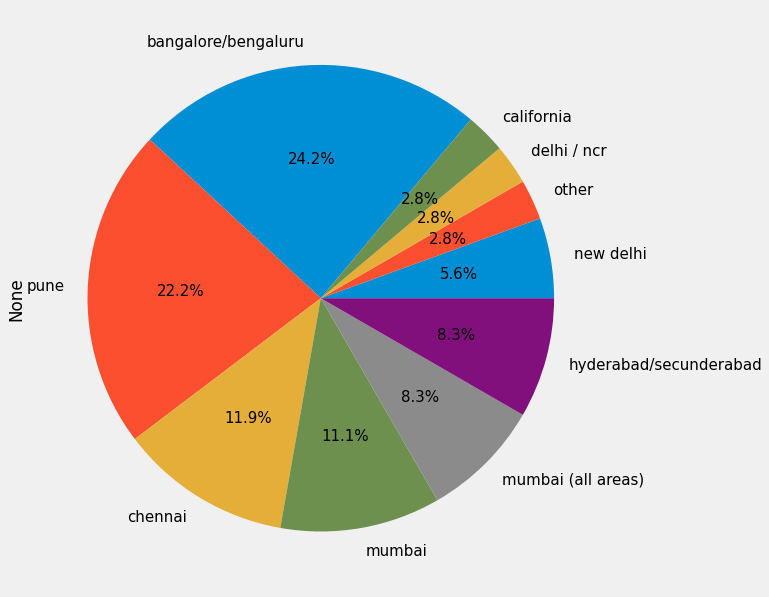

In [57]:
location[:10].plot.pie(figsize = (12,10)
, startangle = 50,
autopct = '%1.1f%%',
fontsize = 15
)

### banglore and pune are the top 2 cities which offer most jobs in india 

## which companies have highest job posting 

Text(0.5, 1.0, 'Job posting')

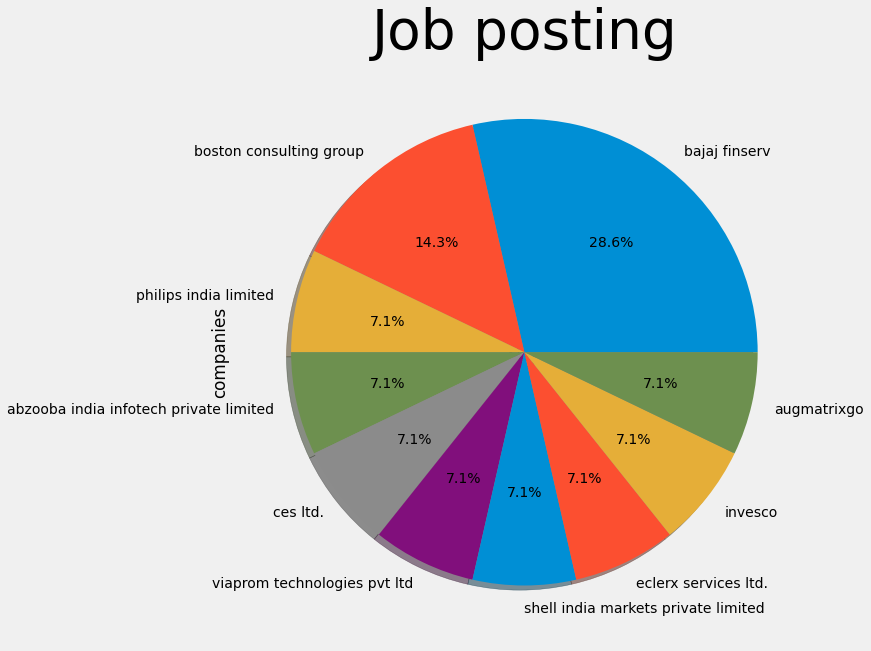

In [58]:
job_opening = lower_df.companies.value_counts()[:10]
job_opening.plot.pie(figsize = (12,10),
shadow = True,
autopct = '%1.1f%%'
)
plt.title('Job posting', fontsize = 55)

### roles as data scientist 
- which roles have higher vacencies 

In [59]:
roles = lower_df.roles.value_counts()[:10]

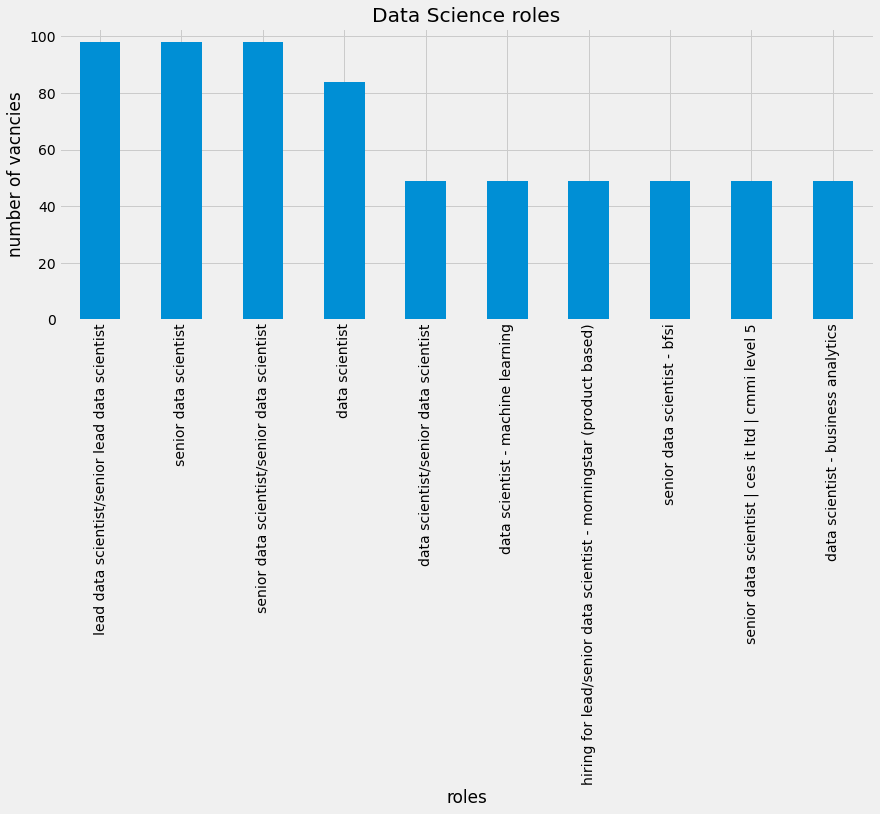

In [64]:
roles.plot.bar(figsize = (13,5))
plt.ylabel('number of vacncies') 
plt.xlabel('roles')
plt.title('Data Science roles')
plt.show()

In [65]:
lower_df.experience.value_counts()

6-10 yrs    980
Name: experience, dtype: int64

## Top skills a data scientist can possess

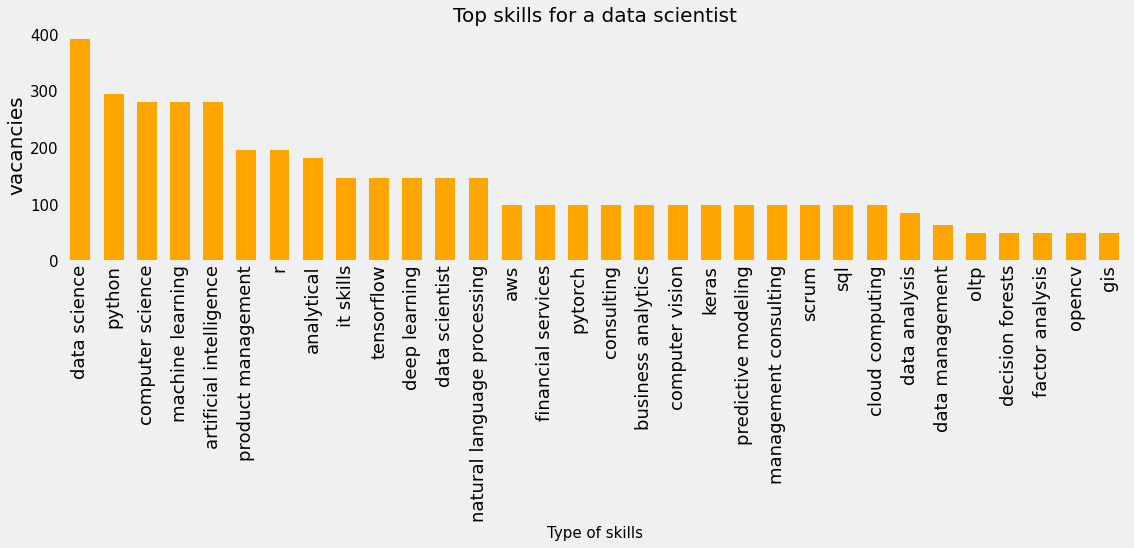

In [93]:
skills = lower_df.skills.apply(pd.Series).stack().value_counts()[:32]
skills.plot(kind = 'bar', figsize = (17,4), fontsize = 15, color = 'orange', width=0.6)
plt.title('Top skills for a data scientist', fontsize = 20)
plt.xlabel('Type of skills', fontsize = 15)
plt.ylabel('vacancies', fontsize = 20)
plt.xticks(fontsize= 18)
plt.grid(b=None)

## This is a checkpoint from this point I will be using advance concepts of regex to perform the analysis 

## Top skills a data scintiest can possess

In [76]:
lower_df = pd.read_csv('scraped_data.csv')
lower_df = lower_df.apply(lambda x : x.astype(str).str.lower())
lower_df['skills'] = lower_df['skills'].str.split('\n')

In [77]:
skill_list = lower_df['skills'].apply(pd.Series).stack().value_counts()
mskills = pd.DataFrame(skill_list).reset_index() 
mskills.columns = ['skills','counts'] 
mskills.head()

topskills = {} 


In [78]:
topskills['machine_learning'] = mskills['counts'][mskills['skills'].str.contains('machine|^ml', regex = True)].sum()
topskills['data_analysis'] = mskills['counts'][mskills['skills'].str.contains('data ana', regex = True)].sum()

topskills['data_mining'] = mskills['counts'][mskills['skills'].str.contains('mining', regex = True)].sum()


topskills['nlp'] = mskills['counts'][mskills['skills'].str.contains('nlp|natural', regex = True)].sum()

topskills['computer_vision'] = mskills['counts'][mskills['skills'].str.contains('vision', regex = True)].sum() 

topskills['deep_learning'] = mskills['counts'][mskills['skills'].str.contains('deep', regex = True)].sum()

topskills['big_data'] = mskills['counts'][mskills['skills'].str.contains('big', regex = True)].sum()

In [79]:
topskills = dict(sorted(topskills.items(), key = lambda x : x[1], reverse=True))

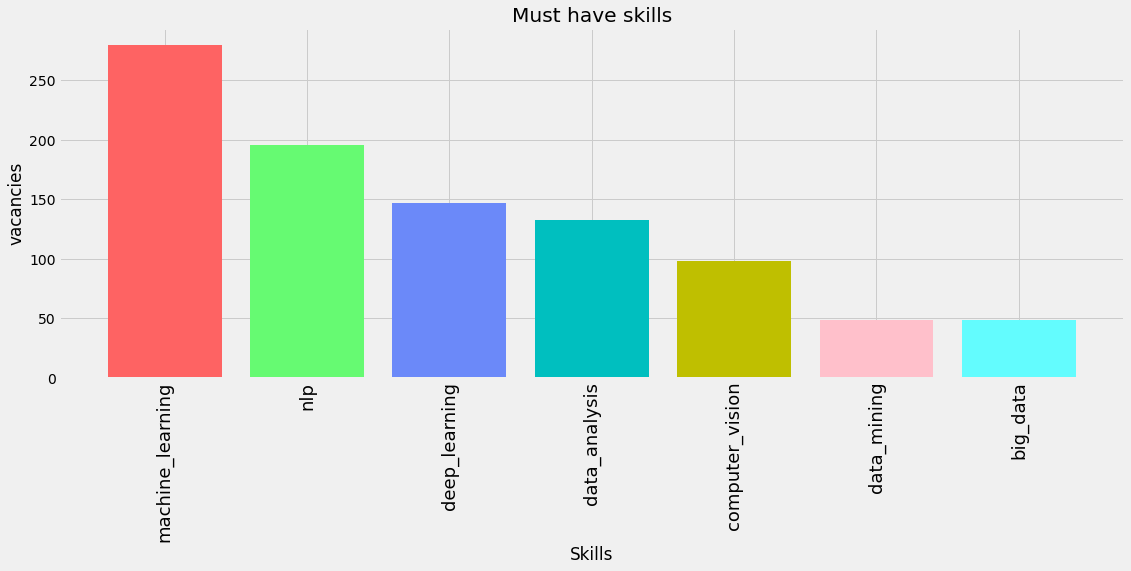

In [86]:
plt.figure(figsize=(17,6))
plt.bar(topskills.keys(), topskills.values(),  color = ["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])

plt.title('Must have skills')
plt.xlabel('Skills') 
plt.ylabel('vacancies')
plt.xticks(rotation = 90, fontsize = 18)

plt.show()


# top languages a data scientist can possess

<BarContainer object of 6 artists>

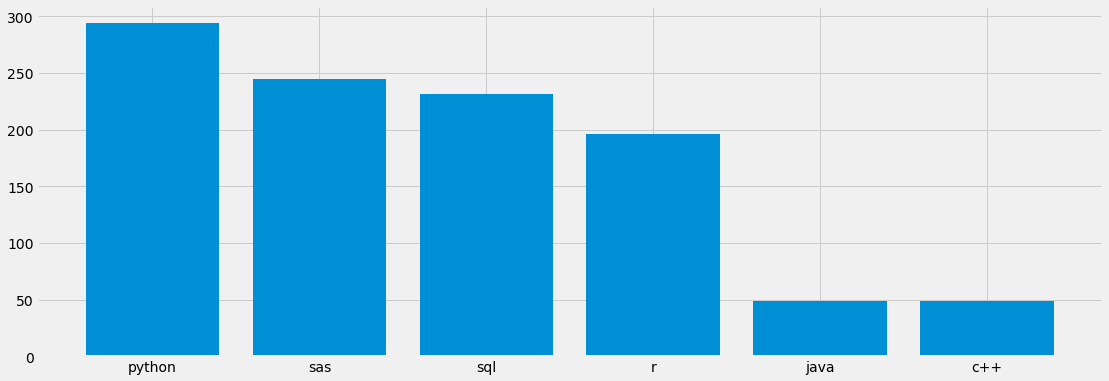

In [94]:
plt.figure(figsize=(17,6))
languages = {} 
languages['python'] = mskills['counts'][mskills['skills'].str.contains('Python|pytho', regex = True)].sum()

languages['r'] = mskills['counts'][mskills['skills'].str.contains('^r$|^R$', regex=True)].sum()

languages['java'] = mskills['counts'][mskills['skills'].str.contains('java$|Java$', regex=True)].sum()

languages['c++'] = mskills['counts'][mskills['skills'].str.contains('C\+|c\+', regex=True)].sum()

languages['sas'] = mskills['counts'][mskills['skills'].str.contains('SAS|sas', regex=True)].sum()

languages['java'] = mskills['counts'][mskills['skills'].str.contains('java$|Java$', regex=True)].sum()

sql = mskills[mskills['skills'].str.contains('sql|SQL', regex = True)]

languages['sql'] = sql['counts'][~sql['skills'].str.contains('no', regex = True)].sum()
languages = dict(sorted(languages.items(), reverse=True,key=lambda x : x[1]))


plt.bar(languages.keys(), languages.values())




## Top deeplearning frameworks a recruters in india prefer 

<BarContainer object of 3 artists>

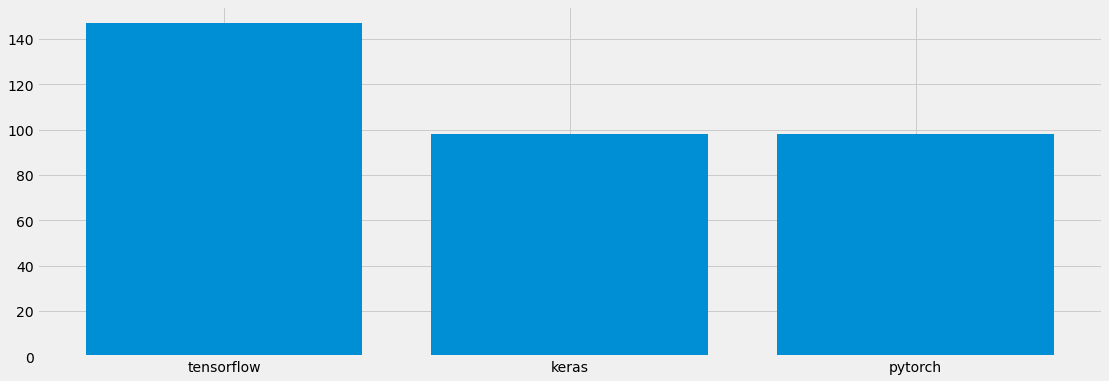

In [95]:
plt.figure(figsize=(17,6))
deep = {} 
deep['tensorflow'] = mskills['counts'][mskills['skills'].str.contains('tensor|Tensor', regex = True)].sum()
deep['keras'] = mskills['counts'][mskills['skills'].str.contains('keras|Keras', regex = True)].sum() 

deep['pytorch'] = mskills['counts'][mskills['skills'].str.contains('Torch|torch', regex = True)].sum()

deep = dict(sorted(deep.items(), reverse=True,key=lambda x : x[1]))


plt.bar(deep.keys(), deep.values())




# Top cloud architecures recruters prefer 

<BarContainer object of 3 artists>

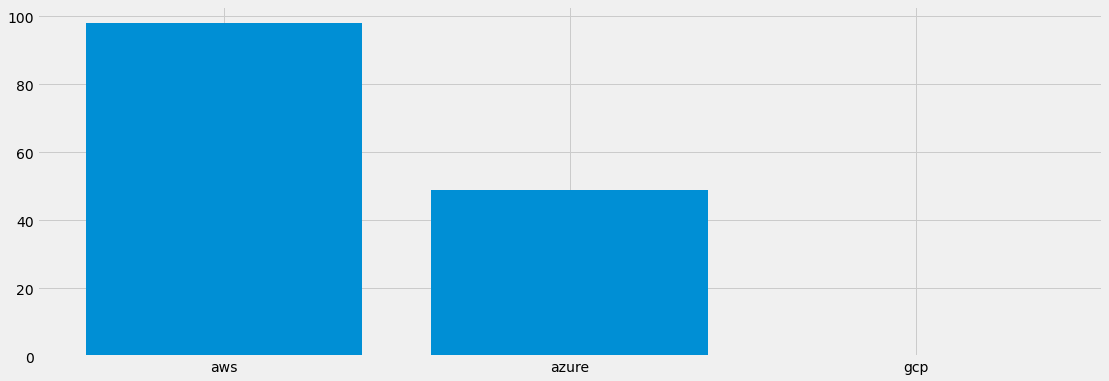

In [96]:
plt.figure(figsize=(17,6))
cloud = {} 

cloud['aws'] = mskills['counts'][mskills['skills'].str.contains('aws|AWS', regex = True)].sum()

cloud['azure'] = mskills['counts'][mskills['skills'].str.contains('azure|Azure', regex = True)].sum()

cloud['gcp'] = mskills['counts'][mskills['skills'].str.contains('gcp|GCP', regex = True)].sum()


cloud = dict(sorted(cloud.items(), reverse=True,key=lambda x : x[1]))


plt.bar(cloud.keys(), cloud.values())



In [ ]:
## Top big data platforms recruters prefer 

<BarContainer object of 4 artists>

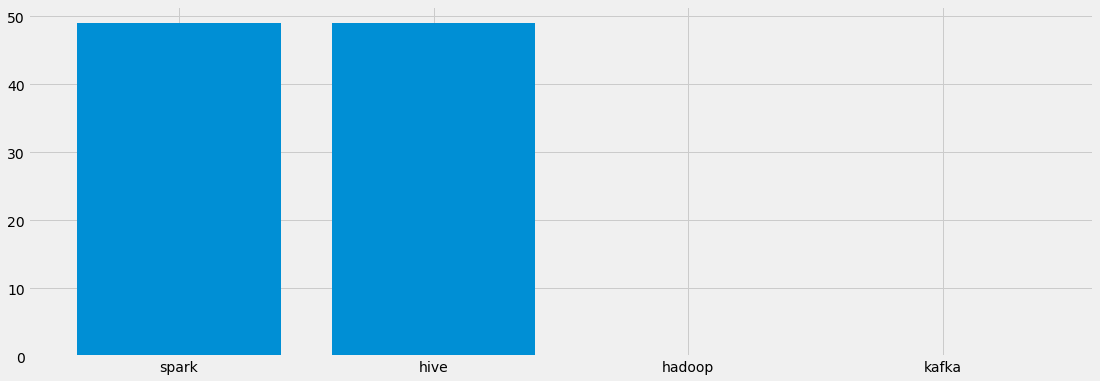

In [97]:
plt.figure(figsize=(17,6))
bigdata = {}

bigdata['spark'] = mskills['counts'][mskills['skills'].str.contains('spark|Spark', regex = True)].sum()

bigdata['hadoop'] = mskills['counts'][mskills['skills'].str.contains('hadoop|Hadoop', regex = True)].sum()

bigdata['hive'] = mskills['counts'][mskills['skills'].str.contains('hive|Hive', regex = True)].sum()


bigdata['kafka'] = mskills['counts'][mskills['skills'].str.contains('kafka|Kafka', regex = True)].sum()


bigdata = dict(sorted(bigdata.items(), reverse=True,key=lambda x : x[1]))


plt.bar(bigdata.keys(), bigdata.values())

In [ ]:
# top business analysis tools recruters prefer (I think the data was lost)

<BarContainer object of 2 artists>

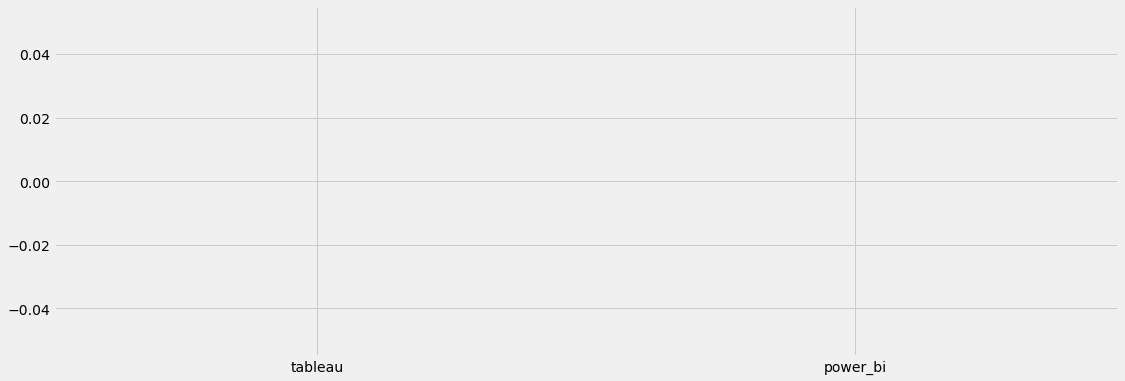

In [98]:
plt.figure(figsize=(17,6))
tools = {} 

tools['tableau'] = mskills['counts'][mskills['skills'].str.contains('tableau|Tableau', regex = True)].sum()

tools['power_bi'] = mskills['counts'][mskills['skills'].str.contains('power bi| Power bi| BI', regex = True)].sum()

tools = dict(sorted(tools.items(), reverse=True,key=lambda x : x[1]))


plt.bar(tools.keys(), tools.values())